In [61]:
#from skimage.feature import hog
#from skimage.color import rgb2grey

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
#PCA
from sklearn.manifold import TSNE
import cv2
#Ignore warnings
import warnings
import numpy as np
warnings.filterwarnings('ignore')
import scipy
import pandas as pd


In [53]:
import os
import glob
image_list = [cv2.resize(cv2.imread("data_2021/bdh/"+x, 0), (100, 33)).flatten() for x in sorted(os.listdir("data_2021/bdh/"))]
#plt.imshow(image_list[666])

In [68]:

y = np.array(pd.read_excel('data_2021/code_bdh.xlsx', header=None))

In [69]:
y.shape

(7560, 1)

In [70]:
np.unique(y)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22])

In [54]:
x = np.array(image_list)

In [55]:
x.shape

(7560, 3300)

In [101]:
%time
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=3000, learning_rate='auto').fit_transform(x)

CPU times: user 7 µs, sys: 13 µs, total: 20 µs
Wall time: 56.3 µs


In [102]:
tsne.shape

(7560, 2)

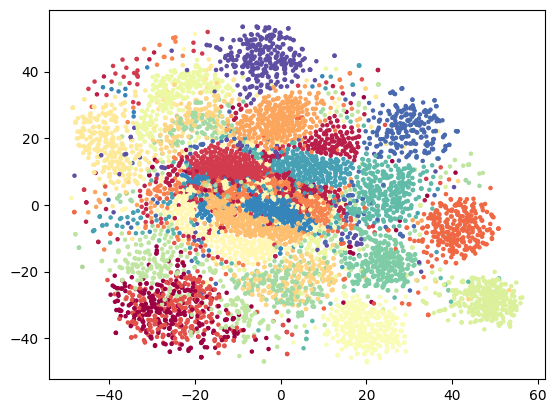

In [105]:
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=y[:], cmap='Spectral')
#plt.xlim(-12, 12)
#plt.ylim(-12, 12)

In [106]:
%time
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=10000, learning_rate='auto').fit_transform(x)

CPU times: user 8 µs, sys: 16 µs, total: 24 µs
Wall time: 30 µs


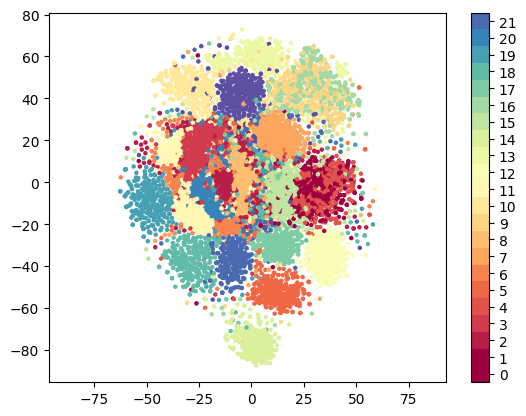

In [109]:
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=y[:], cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(23)-0.5).set_ticks(np.arange(22))
#plt.xlim(-12, 12)
#plt.ylim(-12, 12)

In [110]:
from sklearn.decomposition import PCA
pca_250 = PCA(n_components=250)
pca_result_250 = pca_250.fit_transform(x)

In [111]:
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=10000, learning_rate='auto').fit_transform(pca_result_250)

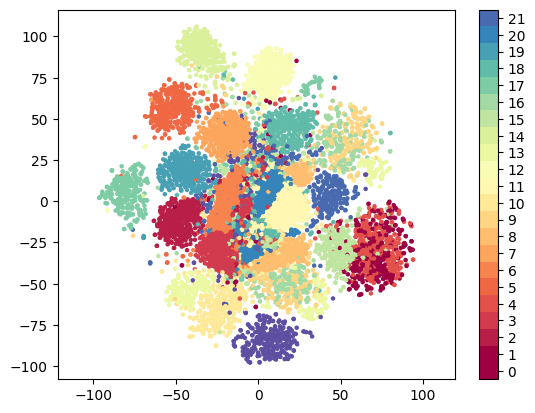

In [112]:
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=y[:], cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(23)-0.5).set_ticks(np.arange(22))

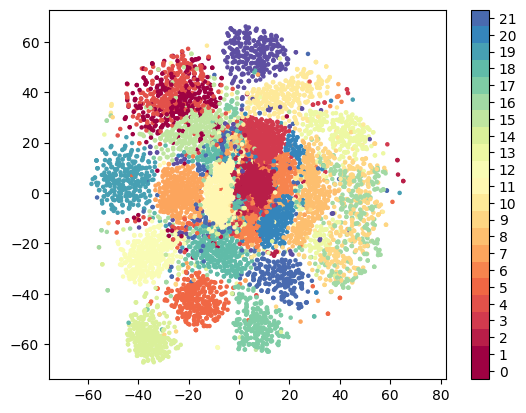

In [114]:
pca_250 = PCA(n_components=500)
pca_result_250 = pca_250.fit_transform(x)
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=3000, learning_rate='auto').fit_transform(pca_result_250)
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=y[:], cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(23)-0.5).set_ticks(np.arange(22))

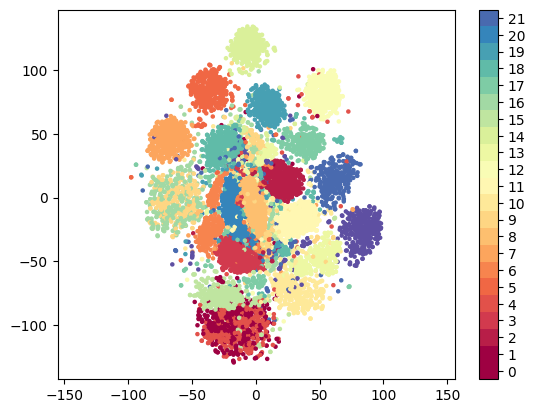

In [121]:
pca_250 = PCA(n_components=150)
pca_result_250 = pca_250.fit_transform(x)
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=10000, learning_rate='auto').fit_transform(pca_result_250)
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=y[:], cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(23)-0.5).set_ticks(np.arange(22))